In [7]:
import numpy as np
from matplotlib import pyplot as plt

# Tutorial 12

### 1. Bulge and disk stars 
a. Plot the data points according to their cartesian coordinates. What is the value of m? What is the value of n? 

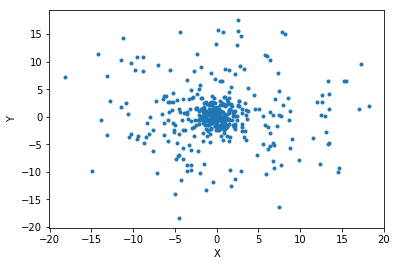

The number of stars in this data set is 442.


In [11]:
filename = 'dataset_LATTE.txt'
data = np.genfromtxt(filename)
plt.scatter(data[:,0],data[:,1],marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(f'The number of stars in this data set is {len(data)}.')

   n - Is the number of features. For this case that is 2 (X,Y|). 
    
    
   m - Is the number of training examples. For this case that is 442.

b. Concatenate the feature in a matrix with dimensions $m\ *\ n$. Then apply feature scaling to have feature with approximately mean 0 and standard deviation 1. 

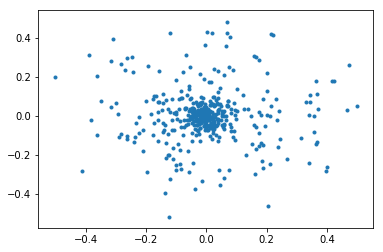

In [22]:
feature = data[:,:2]
feature = feature/np.mean(feature)
feature[:,0] = (feature[:,0]-np.mean(feature[:,0]))/(np.max(feature[:,0]-np.min(feature[:,0])))
feature[:,1] = (feature[:,1]-np.mean(feature[:,1]))/(np.max(feature[:,1]-np.min(feature[:,1])))
plt.scatter(feature[:,0],feature[:,1],marker='.')
plt.show()

3. Implement gradient descent and test it on a multidimensional polynomial. 

In [149]:
def predictor(train,weights):
    return np.dot(train,weights)

def cost_function(prediction,label):
    return np.sum((prediction-label)**2)*1/(2*len(prediction))

def cost_function_deriv(prediction,train,label):
    return np.sum(np.dot(prediction-label,train))/len(train)

def grad_desc(train,labels,step = 0.1,max_it=10):
    weights = np.random.normal(size = (len(train[0])+1))
    weights = [1/3,2,1]
    print(weights)
    it = 0
    loss = 0 

    # Adding bias to the training set
    bias = np.ones((len(train),1))
    train = np.hstack((train,bias))
    
    for i in range(max_it):
        it += 1
        print(it)
        
        h = predictor(train,weights)
        cost = cost_function(h,labels)
        deriv = cost_function_deriv(h,train,label)
        print('Deriv',deriv)
        weights = weights - step*deriv
        
        #print(weights[:3])
    #print(f'Loss after {it} iterations is: {loss}.')
    
    return weights, loss
    
    

In [150]:
train = np.linspace([0,0],[10,10],1000)
a, b = 2/3, 2
label = a*train[:,0]+b*train[:,1]
trained = grad_desc(train,label)


[0.3333333333333333, 2, 1]
1
Deriv -12.900011122233334
2
Deriv 186.27624669120956
3
Deriv -2689.8302453057972
4
Deriv 38841.1666923675
5
Deriv -560866.7062380982
6
Deriv 8098918.980932372
7
Deriv -116948444.13150339
8
Deriv 1688736313.6956387
9
Deriv -24385363639.276634
10
Deriv 352124813682.97736


In [90]:
x = np.array([[1,2],[3,4]])
x.sum(axis=0)

array([4, 6])